<font size=6  color=#003366> [LEPL1109] - STATISTICS AND DATA SCIENCES <br><br> 
(PART II) TP 02 - When the best is the enemy of the good...   </font> <br><br><br>

<font size=5  color=#003366>
Prof. D. Hainaut<br>
Prof. L. Jacques<br>

<br><br>
Anne-Sophie Collin [ASC]   (anne-sophie.collin@uclouvain.be)<br><br>
Cécile Hautecoeur [CH]    (cecile.hautecoeur@uclouvain.be)<br> <br>
Guillaume Van Dessel [GVD] (guillaume.vandessel@uclouvain.be)<br><br>
Loïc Van Hoorebeeck [LVH]  (loic.vanhoorebeeck@uclouvain.be)<br> <br>
<div style="text-align: right"> Version 4.2 (19 November 2020)</div>

<br><br>
</font>

<br>

<font size=7 color=#009999> 1. The problem of overfitting </font> <br><br> 

*Protip: Have a quick look to [`theory_tp2.pdf`](theory_tp2.pdf), for some reminder about some mathematical tools required to solve this exercice, as well as some complementatry information that can help your understanding.* 

<br>
<font size=5 color=#009999> 1.1  Starter - A first taste of overfitting </font> <br>

Assume a target variable $y \in \mathbb{R} $ from a single feature $x \in \mathbb{R}$. We want to create a polynomial model from a sample of $N$ observations: $(\textbf{x}, \textbf{y}) \in \mathbb{R}^{N} \times \mathbb{R}^{N}$. We will analyze three different regression models:

- $f_0$: A *constant* linear regression model;
- $f_1$: A linear regression model;
- $f_4$: A polynomial (degree 4) regression model.

The models are evaluated using the least-squares error between their predictions based on $\textbf{x}$ and the observations $\textbf{y}$: $$||\mathbf{f}_p(\textbf{x}) - \textbf{y}||_2^2 \, ,$$

for $p \in \left \{0, 1, 4 \right \}$.

<div class="alert alert-block alert-info">
<b>Link between polynomial approximations and linear regressions:</b> 
    The polynomial model considered here is the following:
    $$(f_p) \qquad \mathbf{y} =  \mathbf{f}_p(\mathbf{x})+ \boldsymbol{\epsilon} , $$
    where 
    $$ \mathbf{f}_p(\mathbf{x}) := \sum_{l=0}^p \beta_l \mathbf{x}^l ,$$
    while the power function applied to the vector $\mathbf{x}$ is taken component-wise.<br>
    This approximation problem can be written as a standard data science problem. Indeed, it suffices to consider the <b>Vandermonde matrix</b>, $\mathbf{V}_p$, of the data points:
    $$ \mathbf{V}_p :=        \begin{bmatrix}
            1 & x_1 & x_1^2 & \dots & x_1^p \\
            1 & x_2 & x_2^2 & \dots & x_2^p \\
            \vdots & \vdots & \vdots & \vdots \\
            1 & x_N & x_N^2 & \dots & x_N^p  \\
        \end{bmatrix}.$$ <br>
    Using this matrix, the model becomes a classical linear regression model
        $$ \qquad \mathbf{\hat{y}} = \mathbf{V}_p \boldsymbol{\beta}   . $$ <br>
    In this way, we transformed our initial problem of <em>polynomial curve fitting</em> of a single feature $x$ to a <em>linear regression</em> of a set of $(p+1)$ artificially created features $(1, x, x^2, \dots, x^p)$. Note that the Vandermonde matrix, $\textbf{V}_p$, corresponds to the <b>feature matrix</b>, usually denoted as $\textbf{X}$.
    
</div>

<br>

Therefore, the **evaluation of the models can be done through the cost function** (that should be as close to zero as possible):
$$||\textbf{V}_p \boldsymbol{\beta} - \textbf{y}||_2^2,$$
where $\beta$ is the vector of coefficients of the polynomial model.

Using this cost function, the optimal solution is called the solution in the *least-squares* sense and is computed as


$$\boldsymbol{\beta}^* = (\mathbf{V_p}^T \mathbf{V_p})^{-1} \mathbf{V_p}^T \mathbf{y} \, . \qquad (1)$$

<br>

<div class="alert alert-warning">
<b>[Question 1] polynomial regression models </b>  <br><br>
    Given the data $(\mathbf{X}, \mathbf{y})$, and using equation (1), obtain the best polynomial models $f_0$, $f_1$ and $f_4$. Then use these models to get the predictions (<code>y_reg_p</code>) of your models at points <code>X_reg</code>.<br><br>    
            <b>Discussion: </b><br>
    <ol>
        <li>Compare all three models, and explain the performance of each one. Do you observe any problem? How to detect and overcome this problem in practice?</li>
        <li>Suppose you had split your data into train and test set, which model would have the best training error, and which model would have the best test error?</li>
        <li>Print and discuss the value of $\boldsymbol{\beta}$ for each model.</li>
    </ol><br><br>
    <b>Bonus question</b>: Discuss the uniqueness of $\boldsymbol{\beta}$.
    
    
</div> 



Beta0 coefficient :
[[6.884]]
Beta1 coefficients :
[[-0.05624113]
 [ 2.94078014]]
Beta4 coefficients :
[[-160.0706583 ]
 [ 332.73415865]
 [-236.99761943]
 [  70.95984292]
 [  -7.45669536]]


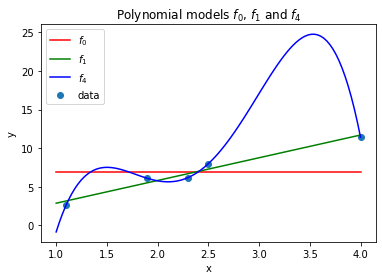

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Synthetic data
X = np.array([[1.1, 1.9, 2.3, 2.5, 4]]).T
y = np.array([[2.7, 6.1, 6.2, 8, 11.42]]).T

#Points at which the model is evaluated
X_reg = np.reshape(np.linspace(1, 4, 100), (100, 1))

#f0
#Vandermonde matrices of degree 0 on the data (V_0) and on the evaluation points (V_reg_0)
V_0 = np.reshape(np.ones_like(X), (len(X), 1))
V_reg_0 = np.ones_like(X_reg)

Beta0=np.linalg.inv((V_0.T)@(V_0)) @ V_0.T @ y
y_reg_0 = V_reg_0@Beta0

print(f"Beta0 coefficient :\n{Beta0}")

#f1

#Vandermonde matrices of degree 1 on the data (V_1) and on the evaluation points (V_reg_1)
# numpy.hstack allows us to stack two vectors column wise. For example :
# a=[[1],[2],[3]] ; b=[[5],[6],[7]] -> hstack(a,b) yields [[1,5],[2,6],[3,7]] 
# we add a column of 1 because we want the model to be : y = X*B -> beta0 + beta1*x
V_1 = np.hstack((np.ones_like(X), X))
V_reg_1 = np.hstack((np.ones_like(X_reg), X_reg))

Beta1=np.linalg.inv((V_1.T)@(V_1)) @ V_1.T @ y
y_reg_1 = V_reg_1@Beta1

print(f"Beta1 coefficients :\n{Beta1}")
#f4

#Vandermonde matrices of degree 4 on the data (V_4) and on the evaluation points (V_reg_4)
V_4 = np.hstack((np.ones_like(X), X, np.power(X, 2), np.power(X, 3), np.power(X, 4)))
V_reg_4 = np.hstack((np.ones_like(X_reg), X_reg, np.power(X_reg, 2), np.power(X_reg, 3), np.power(X_reg, 4))) 

Beta4=np.linalg.inv((V_4.T)@(V_4)) @ V_4.T @ y
y_reg_4 = V_reg_4@Beta4

print(f"Beta4 coefficients :\n{Beta4}")

plt.scatter(X, y, label='data')
plt.plot(X_reg, y_reg_0, color='r', label='$f_0$')
plt.plot(X_reg, y_reg_1, color='g', label='$f_1$')
plt.plot(X_reg, y_reg_4, color='b', label='$f_4$')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Polynomial models $f_0$, $f_1$ and $f_4$")

plt.legend()
plt.show()

#### Compare all three models, and explain the performance of each one. Do you observe any problem? How to detect and overcome this problem in practice?
$f_0$ is simply a line, it underfits the data we don't have any prediction power with this method. <br>
$f_1$ is a linear regression, it fits pretty well the 5 points and we have some prediction power with it. <br>
$f_4$ completly overfits the data. A 4 power polynomial is able to fit through 5 points. Therefore it finds the polynome that goes through those 5 points. But if we look at the value it would yield for 3.5, it's a lot bigger than what $f_1$ would say. <br>
If we want to detect this problem we should split our data into a training and a test set to check the accuracy of the model for new unknown values.

#### Suppose you had split your data into train and test set, which model would have the best training error, and which model would have the best test error?
$f_4$ would have the best training error because it goes through each point therefore its training error is 0. We would however get the best test error with the linear model $f_1$ because it won't overfit the data. 

#### Print and discuss the value of  𝜷  for each model.
Beta has very big values in $f_4$ (in comparison to the other). Moreover they oscillates between positive and negative values. Indeed, big coefficients have to counter-balance themselves to fit the data. It explains why we can observe big oscillation on the graph of $f_4$.

<br>
<font size=5 color=#009999> 1.2 Main course - Regularization as a tool  </font> <br>

We propose to use *Tikhonov regularization* as a tool to avoid our model to overfit the data. This is done by penalizing the euclidean norm of the model parameters. In particular, let $\boldsymbol{\beta}$ be the parameters, the optimization problem to obtain our regression model is now

$$ \min_{\boldsymbol{\beta}} {|| V \boldsymbol{\beta} - \mathbf{y} ||_2^2 + \lambda || \boldsymbol{\beta}||_2^2},  $$

for a given metaparameter $\lambda \geq 0$.

The optimal solution is now

$$ \boldsymbol{\beta}^* = (\mathbf{V_p}^T \mathbf{V_p} + \lambda \boldsymbol{I}_{p+1})^{-1} (\mathbf{V_p}^T \mathbf{y}), $$

with $\textbf{I}_{p+1}$ the appropriate unitary matrix.

<div class="alert alert-warning">
<b>[Question 2] Regularization of polynomial regression models </b>  <br>
<ol>
    <li> <b>Using the regularization: </b> Modify you code of the previous question to account for the regularization. How do the models perform with $\lambda = 10^6$, $1$, $10^{-3}$ or $10^{-5}$? Print and discuss the values of $\boldsymbol{\beta}$.

Give two advantages of such regularization.<br> <br>
            <li> <b>  Playing with $\lambda$: </b>Interpret the solution for $\lambda = 0$ and $\lambda \to \infty$, how would you choose the best $\lambda$?

Propose a modification of the objective to obtain a better solution for $\lambda \to \infty$. 
</ol><br><br>
    <b>Bonus question</b>: Discuss now the uniqueness of $\boldsymbol{\beta}$ for $\lambda>0$.
</div> 


Beta4 coefficients with lambda = 10^6 :
[[3.32198746e-05]
 [9.02146981e-05]
 [2.74828428e-04]
 [9.15518322e-04]
 [3.25430114e-03]]
Beta4 coefficients with lambda = 10^-5 :
[[-160.0706583 ]
 [ 332.73415865]
 [-236.99761943]
 [  70.95984292]
 [  -7.45669536]]


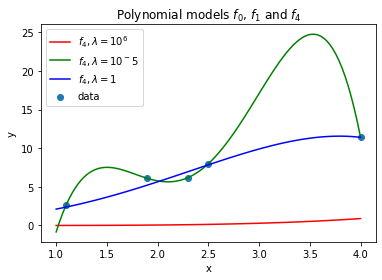

In [2]:
import numpy as np
import matplotlib.pyplot as plt


# Synthetic data
X = np.array([[1.1, 1.9, 2.3, 2.5, 4]]).T
y = np.array([[2.7, 6.1, 6.2, 8, 11.42]]).T

X_reg = np.reshape(np.linspace(1, 4, 100), (100, 1))
lamb = 1

V_4 = np.hstack((np.ones_like(X), X, np.power(X, 2), np.power(X, 3), np.power(X, 4)))
V_reg_4 = np.hstack((np.ones_like(X_reg), X_reg, np.power(X_reg, 2), np.power(X_reg, 3), np.power(X_reg, 4))) 

onezie= np.zeros((len(X), len(X)), int)
np.fill_diagonal(onezie, lamb)

Beta4=np.linalg.inv((V_4.T)@(V_4) + onezie) @ V_4.T @ y
y_reg_41 = V_reg_4@Beta4

lamb = 10**6
onezie= np.zeros((len(X), len(X)), int)
np.fill_diagonal(onezie, lamb)

Beta4=np.linalg.inv((V_4.T)@(V_4) + onezie) @ V_4.T @ y
y_reg_4106 = V_reg_4@Beta4

print(f'Beta4 coefficients with lambda = 10^6 :\n{Beta4}')

lamb = 10**-5
onezie= np.zeros((len(X), len(X)), int)
np.fill_diagonal(onezie, lamb)

Beta4=np.linalg.inv((V_4.T)@(V_4) + onezie) @ V_4.T @ y
y_reg_4105 = V_reg_4@Beta4

print(f'Beta4 coefficients with lambda = 10^-5 :\n{Beta4}')

plt.scatter(X, y, label='data')
plt.plot(X_reg, y_reg_4106, color='r', label='$f_4, \lambda = 10^6$')
plt.plot(X_reg, y_reg_4105, color='g', label='$f_4, \lambda = 10^-5$')
plt.plot(X_reg, y_reg_41, color='b', label='$f_4, \lambda = 1$')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Polynomial models $f_0$, $f_1$ and $f_4$")

plt.legend()
plt.show()

#We advice you to use and adapt the code from previous exercise, yeah no kidding ?

#### Using the regularization: Modify you code of the previous question to account for the regularization. How do the models perform with  𝜆=10^6 ,  1 ,  10^−3  or  10^−5 ? Print and discuss the values of  𝜷 . Give two advantages of such regularization.
Using the regularization is good because it shrinks the risk of overfitting values and we avoid noise modelling. 
#### Playing with  𝜆 : Interpret the solution for  𝜆=0  and  𝜆→∞ , how would you choose the best  𝜆 ?
We can observe that as $\lambda$ increases the value $\beta$ tend to zero because the problem come down to minimizing the norm of $\beta$. If we want to avoid that, we can define another "condition". Going from $\lambda$ ||$\beta$||² to $\lambda$||$\beta - \beta^*$||² where $\beta^*$ is a guess of the solution values. <br>
For $\lambda$ = 0, we get the previous simple problem of minimizing the cost function without taking into account the norm of $\beta$ 

<br>
<font size=5 color=#009999> 1.3 Dessert - What if we overfit the overfitting? </font> <br>

<div class="alert alert-warning">
<b>[Question 3] When we overfit the overfitting... </b>  <br>
<ol>
    <li><b> How to choose $\lambda$? </b> Let us now focus on $f_4$. Propose a procedure to choose the value of $\lambda$.

(Hint: It may be useful to compare training and test error.)
        
How to assess the quality of your regularized model?<br> <br>
    <li> <b> Discussion: </b> we implemented for you a train/test procedure for choosing the best $\lambda$.<br><br>
        First, set <code>flag_lambda_0</code> to <samp>False</samp> and comment the two graphs. Does the value of the validation error seems intuitive to you? What can you conclude from the value of the test error? <br><br>
        Second, set <code>flag_lambda_0</code> to <samp>True</samp> to observe the behavior of your model without regularization. What can you conclude?
</ol>
</div> 





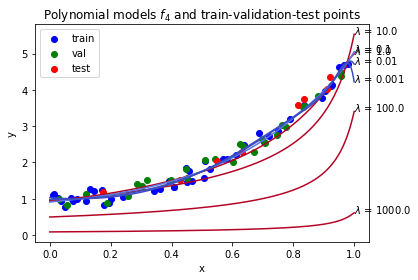

Optimal lambda is 0.13219411484660287


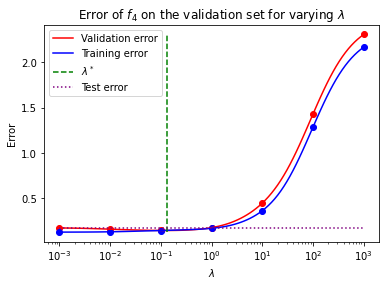

In [3]:
flag_lambda_0 = False

# Remark: nothing to code below!

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

np.random.seed(40)

beta_true = [1.5, 2.4, 0, 1]  # True synthetic model

n_point = 80

X = np.random.rand(n_point, 1)  # Features
N = (np.random.rand(n_point, 1)-0.5)*0.5  # Additive noise
y = np.polyval(beta_true, X) + N  # Noisy target

_X, X_test, _y, y_test = train_test_split(X, y, test_size=0.1)  # 10% test set

X_train, X_val, y_train, y_val = train_test_split(_X, _y, test_size=0.366)  # 0.33% validation set


n_train = X_train.shape[0]
n_test = X_test.shape[0]
n_val = X_val.shape[0]


X_plot = np.linspace(0, 1, 200)

# Plot the data with color discrimination for each set
plt.scatter(X_train, y_train, color='blue', label='train')
plt.scatter(X_val, y_val, color='green', label='val')
plt.scatter(X_test, y_test, color='red', label='test')
plt.legend()


# Vandermonde matrix
V_train = np.vander(np.reshape(X_train, n_train), increasing=False)

lamb_points = np.logspace(3, -3, num=7)  # 6 different lambda values

if flag_lambda_0:
    lamb_points = np.append(0, lamb_points)
colors = [mpl.cm.coolwarm (x) for x in lamb_points]


val_err_points = []
train_err_points = []
val_err_line = []
train_err_line = []

# First plot: vizualization of interpolation polynomial
# Loop through the 6 lambda values, compute the regularized model and plot the interpolation polynomial on [0, 1]
for (l, c) in zip(lamb_points, colors):
    beta = np.linalg.inv(V_train.T @ V_train+l*np.eye(n_train, n_train)) @ V_train.T @ y_train
    plt.plot(X_plot, np.polyval(beta, X_plot), c=c)
    plt.text(X_plot[-1], np.polyval(beta, X_plot[-1]), r'$\lambda$ = %s' % l)
    
    val_err_points.append(np.linalg.norm(np.polyval(beta, X_val)-y_val)/np.sqrt(n_val))
    train_err_points.append(np.linalg.norm(np.polyval(beta, X_train)-y_train)/np.sqrt(n_train))



# Second plot: vizualization of training and testing errors

lamb_line = np.logspace(3, -3, 100)  # More lambda values, used to plot error functions

for l in lamb_line:
    beta = np.linalg.inv(V_train.T @ V_train+l*np.eye(n_train, n_train)) @ V_train.T @ y_train
    val_err_line.append(np.linalg.norm(np.polyval(beta, X_val)-y_val)/np.sqrt(n_val))
    train_err_line.append(np.linalg.norm(np.polyval(beta, X_train)-y_train)/np.sqrt(n_train))

  
plt.xlabel("x")
plt.ylabel("y")
plt.title("Polynomial models $f_4$ and train-validation-test points")
plt.show()

plt.plot(lamb_line, val_err_line, color='r', label='Validation error')
plt.plot(lamb_line, train_err_line, color='b', label='Training error')

if not flag_lambda_0:
    plt.xscale('log')

plt.scatter(lamb_points, val_err_points, color='r')
plt.scatter(lamb_points, train_err_points, color='b')


l_opt = lamb_line[np.argmin(val_err_line)]

print('Optimal lambda is', l_opt)

beta_opt = np.linalg.inv(V_train.T @ V_train+l_opt*np.eye(n_train, n_train)) @ V_train.T @ y_train
test_err = np.linalg.norm(np.polyval(beta_opt, X_test)-y_test)/np.sqrt(n_test)



plt.plot([l_opt, l_opt], [np.min(train_err_line), np.max(val_err_line)], linestyle='dashed', color='green', label='$\lambda^*$')
plt.plot([min(lamb_line), max(lamb_line)], [test_err, test_err], linestyle='dotted', color='purple', label='Test error')

plt.legend()

plt.xlabel("$\lambda$")
plt.ylabel("Error")
plt.title("Error of $f_4$ on the validation set for varying $\lambda$")
plt.show()


### Observations :
#### Flag = False : 
We can observe that the validation error is bigger than the training error. It's logical because our model is trained to have the smallest error on our training set. The best possible values for $\lambda$ are within \[$10^{-3}$,1\].

#### Flag = True :
The solution we would have without regularization is horrendous. The error is sky rocketing.

<br>
<font size=7 color=#009999>  2. Model and parameter selection </font> <br><br> 

You are interested in predicting the progression of diabete. For this purpose, you have access to different parameters such as age, sex, body mass index (BMI), average blood pressure and blood serum measurements. Your goal is to quantify the measure of disease progression. 

Let us first import the dataset (<a href="https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html#sklearn.datasets.load_diabetes">load_diabetes</a> from sklearn). Note that there is no need to standardize the data as a preprocessing step has already been performed on them! 

We also split the dataset into a training and testing set, with test size 0.33.

In [4]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

X, y = load_diabetes(return_X_y=True) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=True, random_state=1)

To perform your regression problem, you consider three distinct methods, each of them with one parameter:

- <a href="https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor">k-neirest neighbors</a>, with as parameter k, the number of considered neighbors.
- <a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html">regularized linear regression </a> (also called ridge regression), with as parameter $\lambda$ (also called $\alpha$), the regularization strenght.  *Note the similarity with the previous exercise...*
- <a href="https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html#sklearn.svm.SVR">support vector machine</a> using linear kernel, with as parameter the regularization parameter $C$.


<div class="alert alert-warning">
<b>[Question 4]</b>  <br>
    <ol>
        <li>To compare those methods, you need an evaluation function, computing the quality of <code>y_pred</code> knowing <code>y_real</code>. Implement a function <code>evaluate</code> that takes as argument <code>y_pred</code> and <code>y_real</code> and returns $\frac{||y\_pred - y\_real||}{||y\_real||}$. Note that we aim to have this score as close to zero as possible! <br> <br>
        <li> Complete the function <code>evalParam</code> that takes as arguments: a set of methods, a set of dictionary of parameters for each method, a data set and an objective. This function evaluates each parameter using <a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html#sklearn.model_selection.KFold">K-folds</a> with 5 folds. Your K-folds should shuffle the data, with <code>random_state</code>=1. This function should return a list of vectors with the score of each parameter for each method. 
    </ol>
</div> 


<div class="alert alert-block alert-info">
<b>Example of use of the evalParam function:</b> <br><br>
    neigh = KNeighborsRegressor() <br>
    methods = [neigh]<br>
    paramN = [{"n_neighbors":1}, {"n_neighbors":5}, {"n_neighbors":10}]  <br>
    param = [paramN]<br>
    scores = evalParam(methods, param, X_train, y_train)<br>
    print(scores)<br>
</div>



In [5]:
from sklearn.model_selection import KFold
import numpy as np

""" -----------------------------------------------------------------------------------------
Evaluates the quality of y_pred knowing real values y_real as ||y_pred-y_real||/||y_real||
INPUT: 
    - y_pred: predicted objective
    - y_real: real objective
OUTPUT:
    - score: quality of the prediction: ||y_pred-y_real||/||y_real||
----------------------------------------------------------------------------------------- """
def evaluate(y_pred, y_real):
    score = np.linalg.norm(y_pred-y_real)/np.linalg.norm(y_real)
    return score

""" ------------------------------------------------------------------------------------------------
Evaluates the methods using different parameters via a K-folds with 5 folds
INPUT: 
    - methods: list of regressors to analyze
    - param: list of size len(methods) containing lists of parameters (in dictionary form) to evaluate
             in other words, param[i][j] is a dictionary of parmeters 
             (for example param[i][j] ={"n_neigbors":1}; while param[i] = paramN in the example above)
    - X: dataset
    - y: objective
OUTPUT:
    - score: list with same shape as param. score[i][j] = mean score over the folds, 
                                                         using method i with parameters param[i][j]
------------------------------------------------------------------------------------------------ """
def evalParam(methods, param, X, y):
    X_arr = np.array(X)
    y_arr = np.array(y)
    
    #Creation of the score list, with 0-scores
    score = []
    for i in range(len(methods)):
        score.append(np.zeros(len(param[i])))
    
    # n_splits = 5 by default but writting it down makes it more explicit and clearer.
    kf = KFold(n_splits=5) 
    
    for train_index, val_index in kf.split(X_arr): # TOCHANGE: Iterate over the 5 folds
        X_train, X_val = X_arr[train_index,:], X_arr[val_index,:]
        y_train, y_val = y_arr[train_index], y_arr[val_index]
    
        for meth in range(len(methods)):
            for p in range(len(param[meth])):
                methods[meth].set_params(**param[meth][p]) #set the parameters p to method meth
                methods[meth].fit(X_train, y_train)
                y_pred = methods[meth].predict(X_val) # prediction of method meth using parameters p
                
                score[meth][p] = evaluate(y_pred, y_val) #TODO score of method meth on parameter p. Caution that we are in for loops...
                
    return score


<div class="alert alert-warning">
<b>[Question 5]</b>  <br>
    Now use this function to evaluate your methods on the following parameters (using your training set!):
    <ul>
       <li> k = 1, 5, 10
       <li> $\lambda$ = 1e-5, 1e-3, 1
       <li> C = 1e-3, 1, 1e3
    </ul> <br>
    Which is the best method among the nine suggested here? 
</div> 

In [6]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.svm import SVR

neigh = KNeighborsRegressor() 
ridge = Ridge()
svr = SVR()

methods = [neigh, ridge, svr]
paramN = [{"n_neighbors":1}, {"n_neighbors":5}, {"n_neighbors":10}]  
paramR = [{"alpha":10**-5}, {"alpha":10**-3}, {"alpha":1}]
paramS = [{"C":10**-3}, {"C":1}, {"C":10**3}]
param = [paramN, paramR, paramS]
scores = evalParam(methods, param, X_train, y_train)
print(f"KNeighborsRegressor {scores[0]},\nRidge {scores[1]},\nSVR {scores[2]}")

KNeighborsRegressor [0.41133534 0.33448328 0.32642137],
Ridge [0.30377043 0.30381303 0.33367831],
SVR [0.45865026 0.43114415 0.38038238]


#### Observations :
Best result are obtained with Ridge and the best score was obtained with parameter $\lambda$ = $1.10^{-5}. Score is quite low which is good but might hid something wrong.

<div class="alert alert-warning">
<b>[Question 6]</b>  <br>
It is not certain that the best regressor was obtained through the nine tests done above. Please try at least 3 other promising regressors. You can also try to modify other parameters than the one proposed here, or even try other methods.  
</div>

In [7]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.svm import SVR

neigh = KNeighborsRegressor() 
ridge = Ridge()
svr = SVR()

methods = [neigh, ridge, svr]
paramN = [{"n_neighbors":15}, {"n_neighbors":20}, {"n_neighbors":30}]  
paramR = [{"alpha":1e-4}, {"alpha":1e-2}, {"alpha":1e-1}]
paramS = [{"C":100}, {"C":250}, {"C":500}]
param = [paramN, paramR, paramS]
scores = evalParam(methods, param, X_train, y_train)
print(f"KNeighborsRegressor {scores[0]},\nRidge {scores[1]},\nSVR {scores[2]}")

KNeighborsRegressor [0.33740131 0.33997117 0.34271763],
Ridge [0.30377295 0.30397893 0.30406098],
SVR [0.32601899 0.33903864 0.36087282]


#### Observations : 
Score haven't changed that much for Ridge but they got better for the SVR method and the KNN. However, because our score is quite low we might have overfit the data. 

<div class="alert alert-warning">
<b>[Question 7]</b>  <br>
Now, check that your best model is still good on your test set and that you did not overfit your training set. 
</div>

In [8]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.svm import SVR

neigh = KNeighborsRegressor() 
ridge = Ridge()
svr = SVR()

methods = [neigh, ridge, svr]
paramN = [{"n_neighbors":15}, {"n_neighbors":20}, {"n_neighbors":30}]  
paramR = [{"alpha":1e-4}, {"alpha":1e-2}, {"alpha":1e-1}]
paramS = [{"C":100}, {"C":250}, {"C":500}]
param = [paramN, paramR, paramS]
scores = evalParam(methods, param, X_test, y_test)
print(f"KNeighborsRegressor {scores[0]},\nRidge {scores[1]},\nSVR {scores[2]}")

KNeighborsRegressor [0.34417574 0.33548542 0.34730122],
Ridge [0.35983614 0.34389725 0.33331518],
SVR [0.36580297 0.39725461 0.43644043]


All the score are quite similar to the previous one done on our train set. They are slightly bigger but nothing concerning. A priori, no overfitting has occured.

<br>
<font size=7 color=#009999>  3. From regressor to classifier </font> <br><br> 

In this very short part, we ask you to convert your regressor to a classifier: instead of predicting the progression of diabete disease, you are going to predict <b>whether a patient is sick</b>.

A simple way of doing such transformation is the <i>tresholding</i>: given a treshold $y_{\textrm{tresh}}$, we return $0$ if our prediction $y_{\textrm{pred}} < y_{\textrm{tresh}}$ and 1 otherwise.


<div class="alert alert-warning">
<b>[Question 8]</b>  <br>
    <ol>
    <li> Use your model of the previous part to design a binary classifier. You can use the mean of $y$ as treshold.
    <li> Compute the precision and recall of your classifier.
    </ol>
</div>

Please find below, a nice picture from [Wikipedia](https://en.wikipedia.org/wiki/Precision_and_recall) to remind you about <i>precision</i> and <i>recall</i>.

<img src="precision_recall.png" width = "300">



In [9]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

#Tresholding 
y_tresh = np.mean(y_train) 

y_test_bin = (y_test > y_tresh)*1.0
y_train_bin = (y_train > y_tresh)*1.0

#TODO use your best method with its best parameters to find y_pred_bin 
# Caution, your model is still trained on the original data (X_train, y_train),
# the tresholding step occurs only at the very end.

# creating the classifier and training the model
clf = Ridge(alpha=1e-1)
clf.fit(X_train, y_train)

# predicting values with the trained classifier
y_pred = clf.predict(X_test) 
y_pred_bin = (y_pred > y_tresh)*1.0

# computing true/false positive and true/false negative
def compute_tp_fp_tn_fn(y_act, y_pred): 
    tp = sum((y_act==1) & (y_pred==1))
    tn = sum((y_act==0) & (y_pred==0))
    fp = sum((y_act==0) & (y_pred==1))
    fn = sum((y_act==1) & (y_pred==0))
    return tp,fp,tn,fn

tp,fp,tn,fn = compute_tp_fp_tn_fn(y_test_bin, y_pred_bin)

#TODO find precision and recall
recall = tp/(tp+fn)
precision = tp/(tp+fp)

print(f"Recall {recall}, Precision {precision}")
print("Double checking with sklearn function :")
print(f"Recall {recall_score(y_test_bin,y_pred_bin)}, Precision {precision_score(y_test_bin, y_pred_bin)}")


Recall 0.6724137931034483, Precision 0.6
Double checking with sklearn function :
Recall 0.6724137931034483, Precision 0.6


There is obviously a trade-off between precision and recall, let us investigate it here.
<div class="alert alert-warning">
       
<b>[Question 9]</b>  <br>
Design a straightforward binary classifier with
<ol>
<li> a perfect precision
<li> a perfect recall
</ol>
Then, compare the three models and discuss whether precision or recall is the most important in our specific medical application.
</div>



In [10]:
# if you want a perfect recall, the most simplistic way to do that is to simply say all the time "you're positif" 
# because need to avoid having any false negatif.
perfect_recall = np.array([1]*len(X_test))
tp,fp,tn,fn = compute_tp_fp_tn_fn(y_test_bin, perfect_recall)
recall = tp/(tp+fn)
print(f"Recall {recall}")

# if you want a perfect precision, it's a lot trickier to achieve that. You want to predict only the point that you're the most
# sure about its belonging.

Recall 1.0


In our model the best thing to have would be a perfect recall. We don't care about diagnosing someone positif if they're not. What trully matters is that no positive patient is said to be negative.